In [3]:
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

# Loading VIA stock data over a 5 year period (2018-01-01 ~ today)

In [30]:
df_viia3 = wb.DataReader('VIIA3.SA', data_source='yahoo', start='2018-01-01')
df_viia3

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,8.04,7.71,7.93,7.71,19000.0,7.698611
2018-01-03,7.97,7.72,7.96,7.75,9700.0,7.738552
2018-01-04,7.91,7.75,7.91,7.81,10700.0,7.798464
2018-01-05,7.88,7.51,7.88,7.56,10000.0,7.548833
2018-01-08,7.78,7.58,7.78,7.69,3400.0,7.678641
...,...,...,...,...,...,...
2022-08-08,3.06,2.89,2.93,2.92,65124700.0,2.920000
2022-08-09,2.99,2.74,2.95,2.79,52965100.0,2.790000
2022-08-10,3.03,2.88,2.90,2.96,67327500.0,2.960000


In [33]:
df_viia3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1144 entries, 2018-01-02 to 2022-08-12
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   High           1144 non-null   float64
 1   Low            1144 non-null   float64
 2   Open           1144 non-null   float64
 3   Close          1144 non-null   float64
 4   Volume         1144 non-null   float64
 5   Adj Close      1144 non-null   float64
 6   simple_return  1143 non-null   float64
dtypes: float64(7)
memory usage: 71.5 KB


# Adding a simple return column (simple_return)

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [31]:
df_viia3['simple_return'] = (df_viia3['Adj Close'] / df_viia3['Adj Close'].shift(1)) - 1
df_viia3

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
2018-01-02,8.04,7.71,7.93,7.71,19000.0,7.698611,NaN
2018-01-03,7.97,7.72,7.96,7.75,9700.0,7.738552,0.005188
2018-01-04,7.91,7.75,7.91,7.81,10700.0,7.798464,0.007742
2018-01-05,7.88,7.51,7.88,7.56,10000.0,7.548833,-0.032010
2018-01-08,7.78,7.58,7.78,7.69,3400.0,7.678641,0.017196
...,...,...,...,...,...,...,...
2022-08-08,3.06,2.89,2.93,2.92,65124700.0,2.920000,0.020979
2022-08-09,2.99,2.74,2.95,2.79,52965100.0,2.790000,-0.044521
2022-08-10,3.03,2.88,2.90,2.96,67327500.0,2.960000,0.060932


# Plotting a line graph with the daily rate of return of (2018-01-01 ~ today)

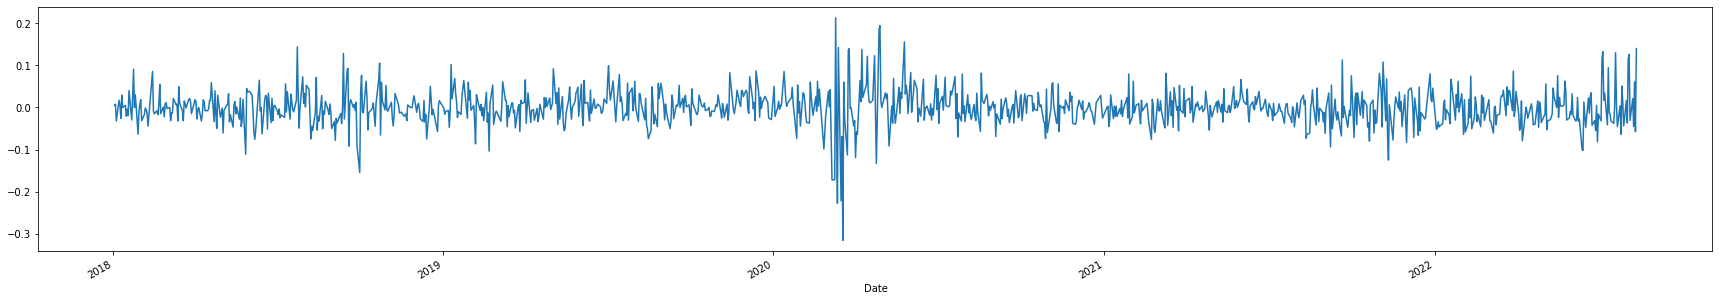

In [32]:
df_viia3['simple_return'].plot(figsize = (30,5))
plt.show()

In [44]:
working_days = 250
avg_returns_daily = df_viia3['simple_return'].mean() * working_days #Dias utéis
print ('The simple rate of return so far is: {:.2%}'.format(avg_returns_daily)) 

The simple rate of return so far is: 3.38%
